<a href="https://colab.research.google.com/github/MaxSMCON/MaxSMCON/blob/main/Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 7  Assignment 




## Uploading Libraries and data

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline
from IPython.display import display
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn import metrics

# StatsModel
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Downloading the dataset

In [ ]:
url = 'https://drive.google.com/file/d/19nvCPmoxePUdPquXsE03MJOvSvif7-NC/view?ts=60ee16aa' ##  path from the goole doc Maxim shared.
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]  ## additional path requred.

data = pd.read_csv(path)
df = data.copy()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Inspection

## Heat Map

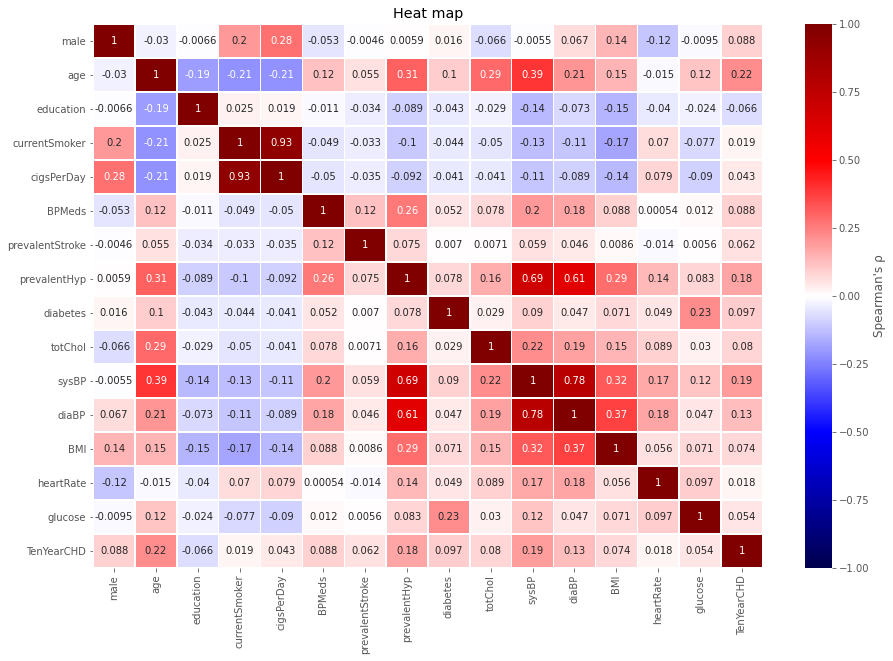

In [ ]:
df_cm = df.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");

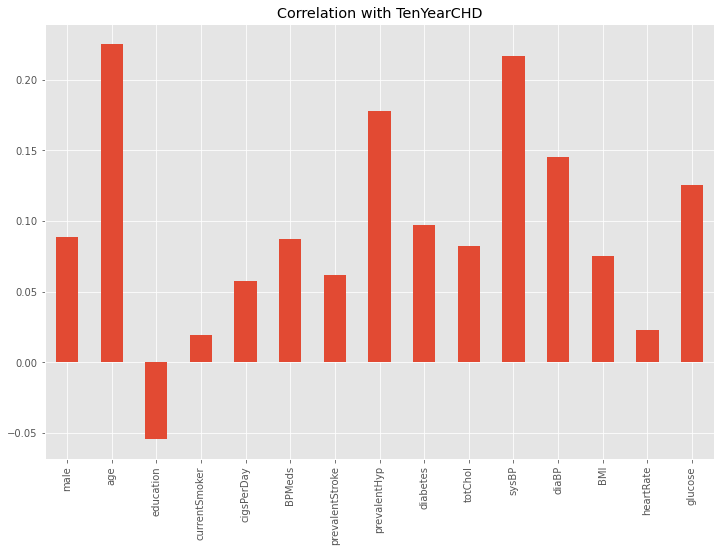

In [ ]:
df.drop('TenYearCHD', axis=1).corrwith(df.TenYearCHD).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with TenYearCHD")

In [ ]:
df.drop('TenYearCHD', axis=1).corrwith(df.TenYearCHD)

male               0.088374
age                0.225408
education         -0.054248
currentSmoker      0.019448
cigsPerDay         0.057755
BPMeds             0.087519
prevalentStroke    0.061823
prevalentHyp       0.177458
diabetes           0.097344
totChol            0.082369
sysBP              0.216374
diaBP              0.145112
BMI                0.075300
heartRate          0.022907
glucose            0.125590
dtype: float64

## Dataset Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB




---


 <li> Data set has 16 columns with 4240 rows


## Unique Values

In [ ]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

<li> 7 attributes are categorical with yes / no
<li> Eduction has 4 values that can be transfered into a boolean by creating four extra attributes


## Missing Values

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<li> 7 attributes have missng values 
<li> We will further inspect the data in order to decide whether to fill the missing values or to drop the rows

# Inspecting CHD through categorical attributes
<li> ratio between males and females in the dataset

In [ ]:
(df['male'].value_counts()/len(df)).round(4)*100

0    57.08
1    42.92
Name: male, dtype: float64

In [ ]:
(df['TenYearCHD'].value_counts()/len(df)).round(4)*100

0    84.81
1    15.19
Name: TenYearCHD, dtype: float64

In [ ]:
# percent of CHD by sex
df.groupby([
            'male',
              ])\
['TenYearCHD' ].agg(['mean', ]).round(4)*100

,mean
male,
0,12.44
1,18.85


In [ ]:
df.groupby([
            'male',
            'currentSmoker',
            'prevalentHyp',
])\
['age', 'TenYearCHD' ].agg(['mean']).round(4)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


age TenYearCHD
                                    mean       mean
male currentSmoker prevalentHyp                    
0    0             0             4898.23       7.19
                   1             5615.18      24.10
     1             0             4557.27       8.83
                   1             5270.78      18.72
1    0             0             5007.19      12.90
                   1             5259.75      24.07
     1             0             4730.41      16.11
                   1             5044.24      30.00

# Functions


 ## Drawing sex distribution by stroke

In [ ]:
def Stroke(df): 
    '''draws Stroke sex and age, takes dataframe as argumnet'''
#     No_Stroke = 'No Stroke'
#     Stroke = 'Had Stroke'
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    women = df[df['male'] == 0]
    men =  df[df['male'] == 1]
    ax = sns.histplot(women[women['prevalentStroke']==0].age.dropna(), bins=15, label = "Female", ax = axes[0], kde =False, color= 'red')
    ax = sns.histplot(men[men['prevalentStroke']== 0].age.dropna(), bins=20, label = 'Male', ax = axes[0], kde =False)
    ax.legend()
    ax.set_title('No Stroke')
    ax = sns.histplot(women[women['prevalentStroke']== 1].age.dropna(), bins=15, label = 'Female', ax = axes[1], kde = False, color = 'red')
    ax = sns.histplot(men[men['prevalentStroke'] == 1].age.dropna(), 
                      bins=20, 
                     label = 'Male', ax = axes[1], 
                      kde = False
                    )
    ax.legend()
    _ = ax.set_title('Stroke')
    return


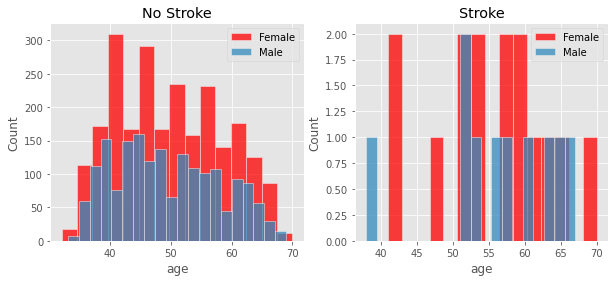

In [ ]:
Stroke(df)

## Draw Function with any Categorical Attribute

In [ ]:
def Failure(df, attribute): 
    '''draws Stroke sex and age, takes dataframe and one categorical attribute as argumnets'''
#     No_Stroke = 'No Stroke'
#     Stroke = 'Had Stroke'
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    women = df[df['male'] == 0]
    men =  df[df['male'] == 1]
    ax = sns.histplot(women[women[attribute]==0].age.dropna(), bins=18, label = "Female", ax = axes[0], kde =False, color= 'red')
    ax = sns.histplot(men[men[attribute]== 0].age.dropna(), bins=20, label = 'Male', ax = axes[0], kde =False)
    ax.legend()
    ax.set_title(attribute+': No')
    ax = sns.histplot(women[women[attribute]== 1].age.dropna(), bins=18, label = 'Female', ax = axes[1], kde = False, color = 'red')
    ax = sns.histplot(men[men[attribute] == 1].age.dropna(), 
                      bins=20, 
                     label = 'Male', ax = axes[1], 
                      kde = False
                    )
    ax.legend()
    _ = ax.set_title(attribute+ ': Yes')
    return


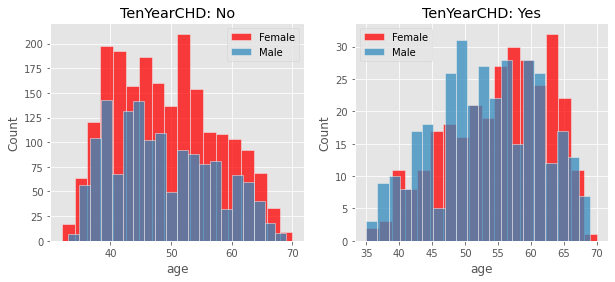

In [ ]:
Failure(df,'TenYearCHD' )

## Draw Categorical

In [ ]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

## Draws Comparison

In [ ]:
def comparing(df1, df2, attribute, attr_2): 
    '''Compares two dataset by sex distributioin from two dataframes with a given attributes by categorical columns
    Takes Four arguments: 
    df1
    df2
    continius atribute
    categorical attribute'''
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8), squeeze = False)
    women1 = df1[df1['male'] == 0]
    men1 =  df1[df1['male'] == 1]
    ax = sns.histplot(women1[women1[attribute]==0][attr_2].dropna(), bins=15, label = "Female", ax = axes[0][0], kde =False, color= 'red')
    ax = sns.histplot(men1[men1[attribute]== 0][attr_2].dropna(), bins=20, label = 'Male', ax = axes[0][0], kde =False)
    ax.legend()
    ax.set_title(attribute+': No')
    ax = sns.histplot(women1[women1[attribute]== 1][attr_2].dropna(), bins=15, label = 'Female', ax = axes[1][0], kde = False, color = 'red')
    ax = sns.histplot(men1[men1[attribute] == 1][attr_2].dropna(), 
                      bins=20, 
                     label = 'Male', ax = axes[1][0], 
                      kde = False
                    )
    ax.legend()
    _ = ax.set_title(attribute+ ': Yes')
    women2 = df2[df2['male'] == 0]
    men2 =  df2[df2['male'] == 1]
    ax = sns.histplot(women2[women2[attribute]==0][attr_2].dropna(), bins=15, label = "Female", ax = axes[0][1], kde =False, color= 'red')
    ax = sns.histplot(men2[men2[attribute]== 0][attr_2].dropna(), bins=20, label = 'Male', ax = axes[0][1], kde =False)
    ax.legend()
    ax.set_title(attribute+': No')
    ax = sns.histplot(women2[women2[attribute]== 1][attr_2].dropna(), bins=15, label = 'Female', ax = axes[1][1], kde = False, color = 'red')
    ax = sns.histplot(men2[men2[attribute] == 1][attr_2].dropna(), 
                      bins=20, 
                     label = 'Male', ax = axes[1][1], 
                      kde = False
                    )
    ax.legend()
    _ = ax.set_title(attribute+ ': Yes')
       
    
    
    return

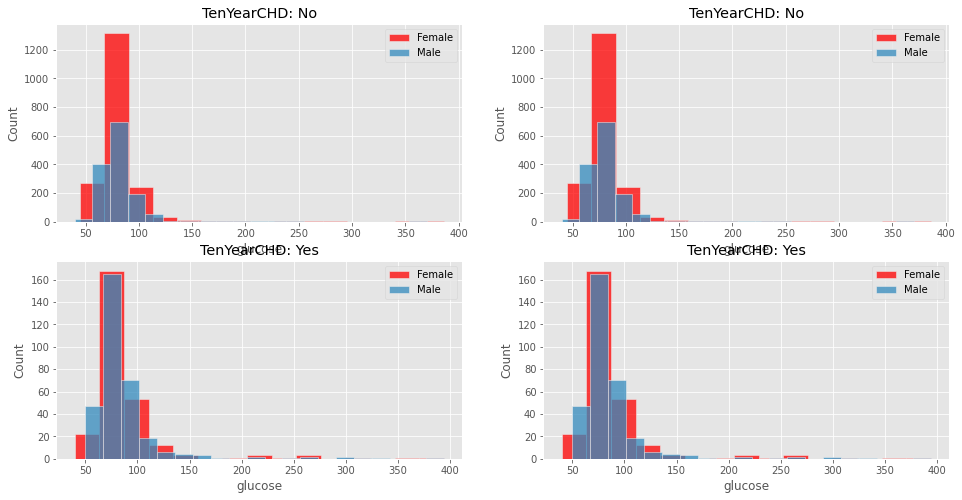

In [ ]:
comparing(df, data, 'TenYearCHD','glucose' )

## Scatter Plots

In [ ]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

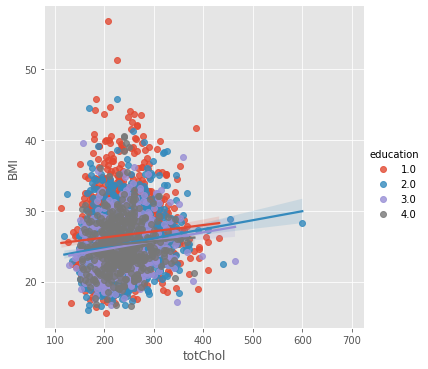

In [ ]:
sns.lmplot(x = 'totChol',  y = 'BMI', hue = "education", 
           data = df,
           )

# Engineering new parameters and Data Imputation
## Grouping by age
## Categorize *cigarettes* per day, for example less or more than 20 cigarettes

# Imputation of Missing Data 

In [ ]:
df.isnull().sum()/len(df)*100 # percent of missing values

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [ ]:
df.isna().mean().round(4) * 100

male               0.00
age                0.00
education          2.48
currentSmoker      0.00
cigsPerDay         0.68
BPMeds             1.25
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.18
sysBP              0.00
diaBP              0.00
BMI                0.45
heartRate          0.02
glucose            9.15
TenYearCHD         0.00
dtype: float64

In [ ]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

## Creating Age Groups

In [ ]:
bins = [ 30, 40 , 50 , 60 , 70 ]
bin_labels = ['30', '40', '50', '60']
df["Age_Group"] = pd.cut(df ['age'], bins, right= True, labels = bin_labels)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40


In [ ]:
sm = df.groupby([
                 'Age_Group',
            'male',
            'currentSmoker',
            ])\
['cigsPerDay' ].agg(['mean', 
                     'count', 
                     
                     ]).round(2)
sm

mean  count
Age_Group male currentSmoker              
30        0    0               0.00    189
               1              14.89    225
          1    0               0.00    111
               1              22.72    220
40        0    0               0.00    442
               1              14.56    453
          1    0               0.00    231
               1              23.00    469
50        0    0               0.00    522
               1              13.14    229
          1    0               0.00    244
               1              21.53    298
60        0    0               0.00    278
               1              12.28     67
          1    0               0.00    128
               1              18.48    105

## Grouping by Age and Sex

In [ ]:
Age_sex = df.groupby([
                'Age_Group',
           'male',
           
           ])\
[['currentSmoker','diabetes','prevalentHyp','prevalentStroke', 'BPMeds','TenYearCHD', ]].agg(['mean', 
                    
                    
                    ]).round(4)*100
Age_sex

currentSmoker diabetes  ... BPMeds TenYearCHD
                        mean     mean  ...   mean       mean
Age_Group male                         ...                  
30        0            54.46     0.72  ...   0.49       3.86
          1            66.67     0.30  ...   0.60       6.61
40        0            51.00     1.55  ...   1.90       7.76
          1            67.33     2.12  ...   1.85      14.85
50        0            31.04     3.04  ...   5.67      16.51
          1            55.39     3.66  ...   2.23      25.78
60        0            19.65     4.91  ...   8.36      26.01
          1            45.06     6.87  ...   3.43      32.19

[8 rows x 6 columns]

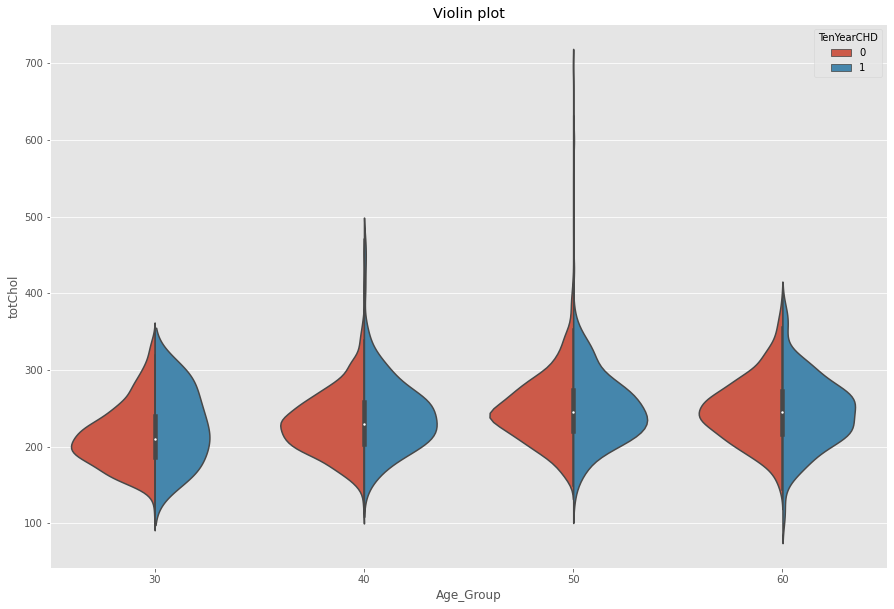

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
g= sns.violinplot(x='Age_Group', y = 'totChol', data = df,
                  hue = 'TenYearCHD', split = True)
g.set_title("Violin plot");

## Imputing cigarettes per day, using `Age_Group`, `male`, and `currentSmoker` attributes


In [ ]:
df['cigsPerDay'].fillna(df.groupby([
                 'Age_Group',
            'male',
            'currentSmoker',
            ])\
['cigsPerDay' ].transform('mean'), inplace = True)
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
Age_Group            0
dtype: int64

## Imputing Glucose

In [ ]:
df['glucose'].fillna(df.groupby([
                 'Age_Group',
            'male',
            'diabetes',
            ])\
['glucose' ].transform('mean'), inplace = True)
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
TenYearCHD           0
Age_Group            0
dtype: int64

## Imputing Cholesterol

In [ ]:
df['totChol'].fillna(df.groupby([
                 'Age_Group',
            'male',
            'prevalentHyp',
            # 'BMI'
            ])\
['totChol'].transform('mean'), inplace = True)
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
TenYearCHD           0
Age_Group            0
dtype: int64

## Check

## Imputing BMI

In [ ]:
df['BMI'].fillna(df.groupby([
                 'Age_Group',
            'male',
            'diaBP',
            ])\
['BMI'].transform('mean'), inplace = True)
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  1
heartRate            1
glucose              0
TenYearCHD           0
Age_Group            0
dtype: int64

## Imputation Check

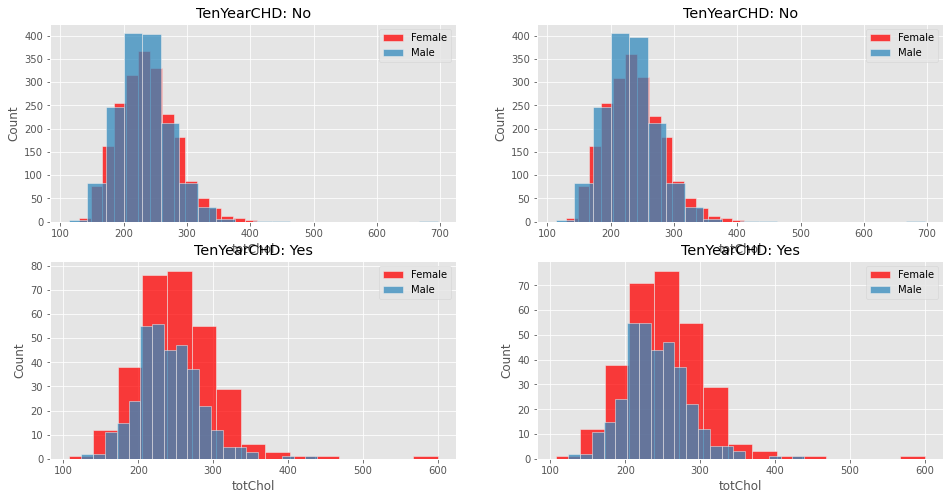

In [ ]:
comparing(df, data, 'TenYearCHD','totChol' )

## Dropping the rest of missing values from BPMEDS (53 values), and education (105 values)

In [ ]:
df.dropna(inplace= True)


In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
Age_Group          0
dtype: int64

# Splitting dataset into training and test parts
The dataset was split using `sklearn` `train_test_split` into 20% train and 80% test portions





In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Age_Group'],
      dtype='object')

## Dataset Classification


In [ ]:
y = df['TenYearCHD']
X = df[['male',
       # 'age', 
'Age_Group',
        'education', 
        'currentSmoker',
        'BPMeds',
        'prevalentStroke', 
        'prevalentHyp',
        'diabetes', 
        'totChol',
        'diaBP', 
        'BMI', 
         'heartRate'
        ]]


## Split by sklearn using strtefy to normilze distribution of CHD

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3264, 12)
(816, 12)
(3264,)
(816,)


In [ ]:
X_test.head()

,male,Age_Group,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate
67,1,30,1.0,1,0.0,0,0,0,223.0,73.0,23.01,65.0
3406,1,40,2.0,1,0.0,0,0,0,212.0,63.5,25.20,80.0
1369,0,40,1.0,0,0.0,0,0,0,249.0,70.0,21.74,94.0
563,0,30,2.0,0,0.0,0,0,0,227.0,77.5,30.24,85.0
3212,1,40,2.0,1,0.0,0,0,0,208.0,85.5,23.85,82.0


## Normalizing data set to fit between 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1

#scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())


0.0 1.0000000000000002
-0.021621621621621623 1.1562853907134767


# KNN by Irina

new code

In [ ]:
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import plot_confusion_matrix

### Feature Selection


In [ ]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=df.iloc[:,0:15]
y=df.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (4080, 15) 
y -  (4080,)


In [ ]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [ ]:
fit=best.fit(X,y)

In [ ]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [ ]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

          Feature        Score
1             age  5465.146379
9         totChol  2624.815674
4      cigsPerDay  2393.961653
10          sysBP  2087.519586
14        glucose   360.071114
11          diaBP   311.374398
7    prevalentHyp   242.094712
3   currentSmoker    95.374662
2       education    54.979667
12            BMI    50.912727
5          BPMeds    50.844492


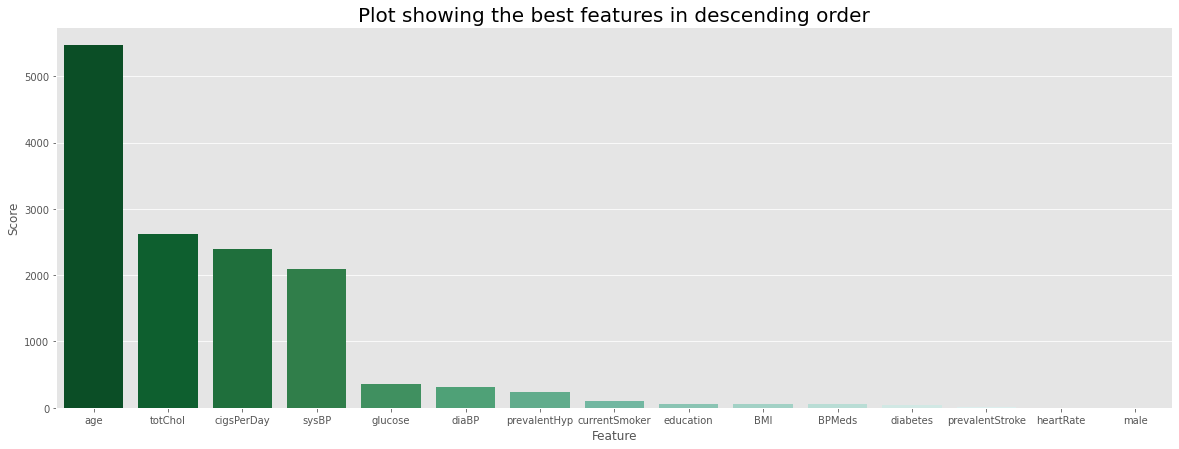

In [ ]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [ ]:
#Select 5 top features
features=scores["Feature"].tolist()[:10]
features

['age',
 'totChol',
 'cigsPerDay',
 'sysBP',
 'glucose',
 'diaBP',
 'prevalentHyp',
 'currentSmoker',
 'education',
 'BMI']

In [ ]:
# data = df[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data_scaled = df[['age', 'totChol','cigsPerDay','sysBP','BMI','TenYearCHD']]
data_scaled.head()

,age,totChol,cigsPerDay,sysBP,BMI,TenYearCHD
0,39,195.0,0.0,106.0,26.97,0
1,46,250.0,0.0,121.0,28.73,0
2,48,245.0,20.0,127.5,25.34,0
3,61,225.0,30.0,150.0,28.58,1
4,46,285.0,23.0,130.0,23.10,0


### Feature Splitting and Scaling

In [ ]:
y = data_scaled['TenYearCHD']
X = data_scaled.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#divide the dataset into training and test sub-datasets for predictive modeling
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

### Predictive Modeling kNN k Nearest Neighbour

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[581  98]
 [107  30]]


Accuracy of k-NN Classification: 74.87745098039215 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       679
           1       0.23      0.22      0.23       137

    accuracy                           0.75       816
   macro avg       0.54      0.54      0.54       816
weighted avg       0.74      0.75      0.75       816



Highest Accuracy:  0.8529411764705882 at K = 11
Minimum error:- 0.14705882352941174 at K = 11


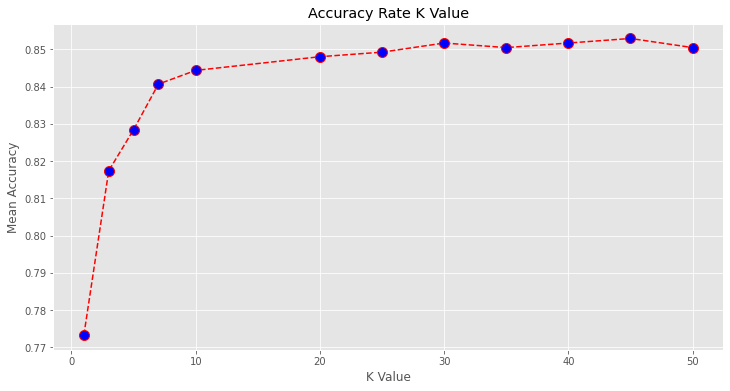

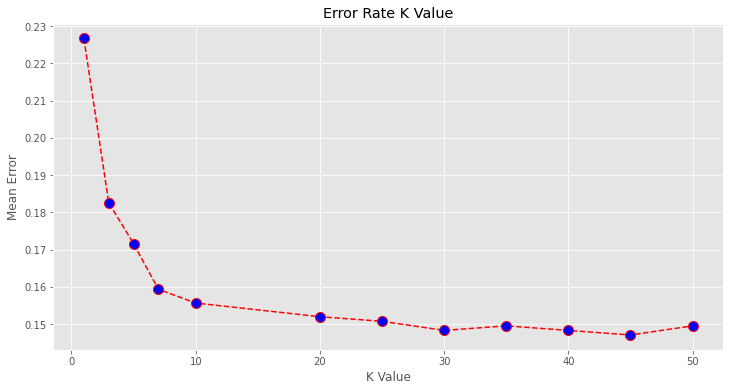

In [ ]:
# Calculating error for K values [1,3,5,7,10,20,25,30,35,40,45,50] and randomly split in 10
num_splits = 10
k_values = [1,3,5,7,10,20,25,30,35,40,45,50]
accuracy = []
error = []
compare = []
for k in k_values:
    acc_samples=[]
    com_samples=[]
    err_samples=[]
    for i in range(num_splits):
        train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)
        knn = KNeighborsClassifier(n_neighbors=k)
        model = knn.fit(train_x, train_y)
        pred_y = knn.predict(test_x)
        acc_samples.append(accuracy_score(test_y,pred_y))
        com_samples.append(np.count_nonzero(test_y == pred_y))
        err_samples.append(np.mean(pred_y != test_y))
    accuracy.append(np.mean(acc_samples))
    compare.append(np.mean(com_samples))
    error.append(np.mean(err_samples))
compare_df = pd.DataFrame({'Correct Predictions': compare, 'Accuracy Score': accuracy}, index = [k_values])
compare_df


plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
print("Highest Accuracy: ",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)


plt.figure(figsize=(12, 6))
plt.plot(k_values, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [ ]:
compare_df

,Correct Predictions,Accuracy Score
1,631.0,0.773284
3,667.0,0.817402
5,676.0,0.828431
7,686.0,0.840686
10,689.0,0.844363
20,692.0,0.848039
25,693.0,0.849265
30,695.0,0.851716
35,694.0,0.850490
40,695.0,0.851716


### Confusion matrix and calssification report for for K values [1,3,5,7,10,20,25,30,35,40,45,50]

<Figure size 2000x1500 with 0 Axes>

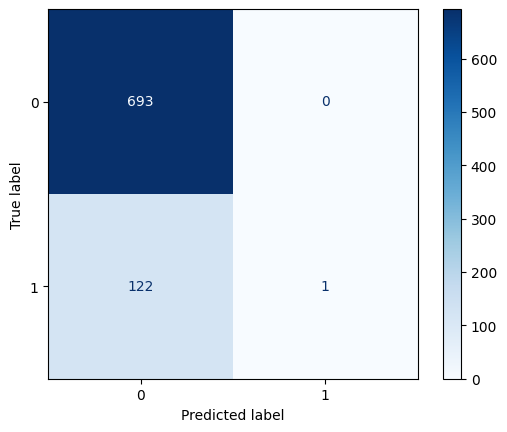

In [ ]:
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn, test_x, test_y, values_format="", cmap="Blues")

In [ ]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       693
           1       1.00      0.01      0.02       123

    accuracy                           0.85       816
   macro avg       0.93      0.50      0.47       816
weighted avg       0.87      0.85      0.78       816



In [ ]:
#check model accuracy with measures
print("kNN Accuracy: ",metrics.accuracy_score(test_y, knn_predict))
print("kNN F1-Score: ",metrics.f1_score(test_y, knn_predict))

kNN Accuracy:  0.7291666666666666
kNN F1-Score:  0.1195219123505976


Additional model training wiith random 1-30 k values

Minimum error:- 0.1482843137254902 at K = 28


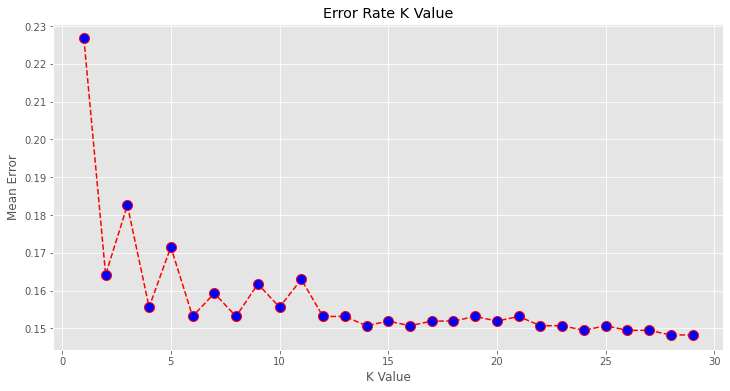

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    knn_predict = knn.predict(test_x)
    error.append(np.mean(knn_predict != test_y))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

### Confusion matrix and calssification report for k between in range 1 - 30

<Figure size 2000x1500 with 0 Axes>

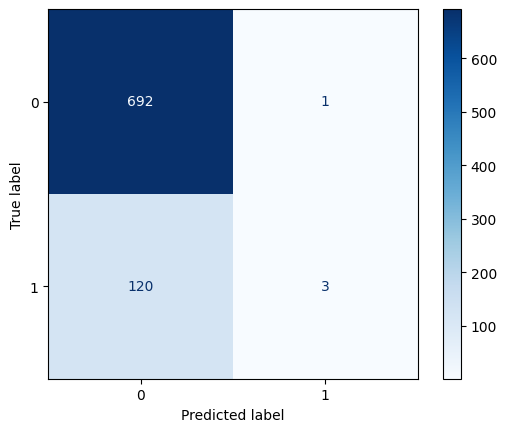

In [ ]:
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(knn, test_x, test_y, values_format="", cmap="Blues")

In [ ]:
print(classification_report(test_y, knn_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       693
           1       0.75      0.02      0.05       123

    accuracy                           0.85       816
   macro avg       0.80      0.51      0.48       816
weighted avg       0.84      0.85      0.79       816



In [ ]:
#check model accuracy with measures

kNN_accuracy = metrics.accuracy_score(test_y, knn_predict)
kNN_f1 = metrics.f1_score(test_y, knn_predict)
print("Accuracy: ",kNN_accuracy)
print("F1-Score: ",kNN_f1)


Accuracy:  0.8517156862745098
F1-Score:  0.04724409448818898


# **Linear Regression** by Aditi

### Systolic BP association with Age, Gender, smoking habits and blood glucose levels.

In [ ]:
model2 = smf.ols(formula='sysBP ~ age + cigsPerDay + male + BMI + glucose', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.80e-240
Time:                        02:28:42   Log-Likelihood:                -17843.
No. Observations:                4080   AIC:                         3.570e+04
Df Residuals:                    4074   BIC:                         3.574e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1553      2.651     16.280      0.0

**Linear association between age and systolic BP**

Is there a linear association between age and systolic BP (sysBP), when considering potential clinical confounders? Chosen confounders are gender, smoking, BMI and blood glucose levels

**Null hypothesis (H0):** In the population, there is no linear association between age and sBP, when controlling forgender, smoking, BMI and blood glucose levels.

**Interpretation** - There is a positive linear association between age and systolic BP, when controlling for other factors such as gender, smoking, BMI and blood glucose levels. Here beta coefficient (95% CI) = 0.8969 (+0.826; +0.968). Since the 95%CI does NOT include 0.0 (and p < 0.05). So we conclude a positive linear association.

**Interpretation of the slope**: For each 1 unit increase in age, mean sysBP increases +0.89 mmHg.



**Linear association between systolic BP (sysBP) and gender**

Is there a linear association between gender and systolic BP (sysBP), when considering potential clinical confounders? Chosen confounders are age, smoking, BMI and blood glucose levels. In the population. Do males have a higher/lower systolic BP than females considering their age, smoking, BMI and blood glucose levels?

**Null hypothesis (H0)** is: In the population, there is no difference between males and females in their average value for sBP, when controlling for age, smoking, BMI and blood glucose levels.

**Alternative hypothesis (H1)**: In the population, there is a difference between males and females in their average value for systolic BP, when controlling for age, smoking, BMI and blood glucose levels.

**Interpretation** -- In the population, males have lower systolic BP (sysBP) than females considering their BMI, age, blood glucose levels and smoking habits. Here beta coefficient (95% CI) = -2.55 (-3.8; -1.3). Since the 95%CI does not include 0.0 (and p<0.05) we conclude that males have a lower average value of systolic BP than females.



**Linear association between systolic BP (sysBP) and cigarettes per day (cigsPerDay)**

Is there a linear association between consumption of cigarettes and systolic BP (sysBP), when considering potential clinical confounders? Chosen confounders are gender, BMI, age and blood glucose levels. In the population, Do smokers have a higher/lower systolic BP than non-smokers considering their gender, BMI, age and blood glucose levels?

**Null hypothesis (H0)** is: In the population, there is no linear association between cigsPerDay and sysBP, when controlling for gender, BMI, age and blood glucose levels.

**Interpretation** -- There is a no significant linear association between smoking/cigarettes per day and sysBP, when controlling for gender, BMI, age and blood glucose levels. Here beta coefficient (95% CI) = 0.0452 (-0.008; 0.099). Since the 95%CI includes 0.0 (and p≥0.05), we conclude that smoking habits do not contribute to systolic blood pressure.




**Does an increase in BMI have an impact on systolic BP?**

**Null hypothesis** (H0) is: In the population, there is no linear association between BMI and sysBP, when considering gender, smoking, age and blood glucose levels.

**Interpretation** -- There is a positive linear association between BMI and sysBP, when controlling for gender, smoking, age and blood glucose levels. Here beta coefficient (95% CI) = 1.52 (+1.3; +1.6). Since the 95%CI does NOT include 0.0 (and p < 0.05) we conclude a positive linear association between BMI and sysBP

**Interpretation of the slope**: For each 1 unit increase in BMI, mean sysBP increases +1.52 mmHg.



**Does blood sugar level (glucose) have an impact on systolic BP?**

**Null hypothesis** (H0) is: In the population, there is no linear association between glucose level and sysBP, when controlling for gender, BMI, smoking and age.

**Interpretation** -- There is a positive linear association between Blood sugar level (glucose) and sysBP, when controlling for gender, BMI, smoking and age. Here beta coefficient (95% CI) = +0.0767 (+0.051; +0.102). Since the 95%CI does NOT include 0.0 (and p < 0.05) we conclude a positive linear association between BMI and sysBP.

**Interpretation of the slope**: For each 1 unit increase in glucose level, mean sysBP increases +0.077 mmHg.


In [ ]:
# For each X, calculate VIF and save in dataframe
  
# the independent variables set
#Z = df[['sysBP' , 'BMI' , 'totChol' , 'glucose']]

Z = df[['cigsPerDay' , 'male', 'prevalentStroke', 'prevalentHyp', 'diabetes','BPMeds', 'sysBP', 'heartRate']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Z.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(len(Z.columns))]
  
print(vif_data)

           feature        VIF
0       cigsPerDay   1.816703
1             male   1.948380
2  prevalentStroke   1.023144
3     prevalentHyp   2.101988
4         diabetes   1.036758
5           BPMeds   1.132300
6            sysBP  34.093200
7        heartRate  29.464743


# **Support Vector Machine** by Maxim

In [ ]:
from sklearn import svm

model = SVC()
model.fit(X_train_scaled, y_train)
y_pred_SVC = model.predict(X_test_scaled)

svm_accuracy = model.score(X_test_scaled, y_test)
svm_f1 = f1_score(y_test, y_pred_SVC)

In [ ]:
print(f"Support Vector Machine:\nAccuracy {svm_accuracy}\nF1 Score: {svm_f1}")

Support Vector Machine:
Accuracy 0.8431372549019608
F1 Score: 0.0


## Confusion for SVM

<Figure size 2000x1500 with 0 Axes>

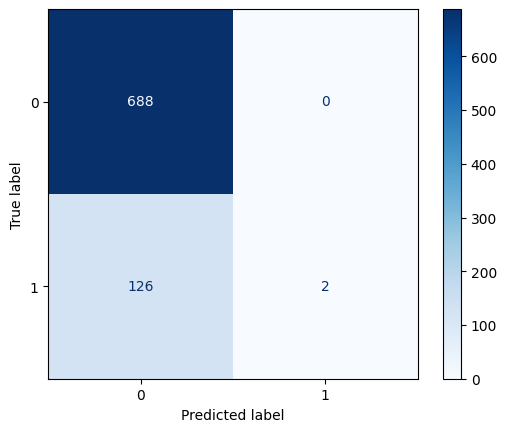

In [ ]:
#visualize classification results with confusion matrix

from sklearn import svm
clf= svm.SVC()
clf.fit(X_test_scaled, y_test)
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(clf, X_test_scaled, y_test, values_format="", cmap="Blues")

## Imbalanced SVM

In [ ]:
X.head()

,age,totChol,cigsPerDay,sysBP,BMI
0,39,195.0,0.0,106.0,26.97
1,46,250.0,0.0,121.0,28.73
2,48,245.0,20.0,127.5,25.34
3,61,225.0,30.0,150.0,28.58
4,46,285.0,23.0,130.0,23.10


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score, plot_confusion_matrix

model = SVC(gamma='scale') #imbalanced dataset

model.fit(X_train_scaled, y_train)
y_pred_SVC = model.predict(X_test_scaled)



test_score = accuracy_score(y_test, model.predict(X_test_scaled)) * 100
train_score = accuracy_score(y_train, model.predict(X_train_scaled)) * 100

svm_acc = model.score(X_test_scaled, y_test)*100
svm_test_f1 = f1_score(y_test, y_pred_SVC)


results_df = pd.DataFrame(data=[["SVM Imbalanced",
                                #  test_score, train_score,  
                                 svm_acc, svm_test_f1, ]], 
                          columns=['Model', 
                                  #  "Test Score", 'Train Score', 
                                   'Accuracy %', 'F1 test score',  ])
results_df

,Model,Accuracy %,F1 test score
0,SVM Imbalanced,84.313725,0.0


## Balanced SVM

In [ ]:

model_balanced = SVC(gamma='scale', #balancing dataset
          class_weight='balanced' 
           )

model_balanced.fit(X_train_scaled, y_train)
y_pred_SVC_bal = model_balanced.predict(X_test_scaled)

test_score = accuracy_score(y_test, model_balanced.predict(X_test_scaled)) * 100
train_score = accuracy_score(y_train, model_balanced.predict(X_train_scaled)) * 100

svm_acc = model_balanced.score(X_test_scaled, y_test)*100
svm_test_f1 = f1_score(y_test, y_pred_SVC_bal)


results_df_2 = pd.DataFrame(data=[["SVM Balanced",
                                    # test_score, train_score,  
                                    svm_acc, svm_test_f1, ]], 
                          columns=['Model',
                                  #  "Test Score", 'Train Score', 
                                   'Accuracy %', 'F1 test score',  ])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy %,F1 test score
0,SVM Imbalanced,84.313725,0.000000
1,SVM Balanced,65.073529,0.370861


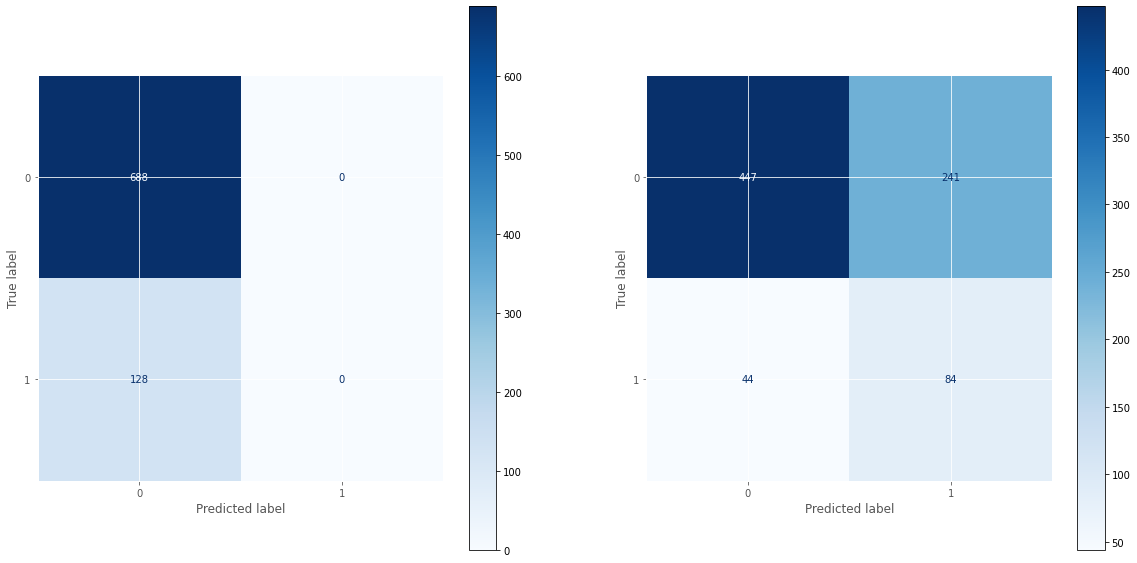

<Figure size 2000x1500 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(model, X_test_scaled, y_test, values_format="", cmap="Blues",ax = axes[0] )
  ax = plot_confusion_matrix(model_balanced, X_test_scaled, y_test, values_format="", cmap="Blues", ax= axes[1])


## SVM model with given parameters couldn't predicts very well abscence of CHD. However, it fails to predict CHD cases.



## New Classification

In [ ]:
    y = df['TenYearCHD']
    X1 = df[['male', 
             'age', 
            #  'education', 
            # 'currentSmoker', 
             'cigsPerDay',
             'BPMeds',
       'prevalentStroke', 
      #  'prevalentHyp',
        'diabetes', 
        'totChol', 
        'sysBP',
       'diaBP', 
       'BMI', 
       'heartRate',
        # 'glucose',
        ]]


## New Split

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, stratify = y)
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(3264, 11)
(816, 11)
(3264,)
(816,)


## Normilizing

In [ ]:
scaler1 = MinMaxScaler() #by default, this will scale each column to between 0 and 1
scaler1.fit(X1_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X1_train_scaled = scaler1.transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)
print(X1_train_scaled.min(), X1_train_scaled.max())
print(X1_test_scaled.min(), X1_test_scaled.max())

0.0 1.0000000000000002
0.0 1.1666666666666667


In [ ]:
## SVM Fitting

In [ ]:

model = SVC()
model.fit(X1_train_scaled, y_train)
y_pred_SVC_1 = model.predict(X1_test_scaled)

svm_acc_1 = model.score(X1_test_scaled, y_test)
svm_f1_1 = f1_score(y_test, y_pred_SVC_1)

## New Results

In [ ]:
print(f"Support Vector Machine:\nAccuracy {svm_acc_1}\nF1 Score: {svm_f1_1}")

Support Vector Machine:
Accuracy 0.8492647058823529
F1 Score: 0.046511627906976744


<Figure size 2000x1500 with 0 Axes>

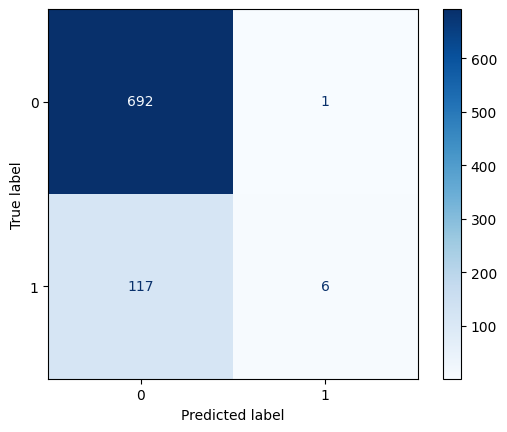

In [ ]:
clf1= svm.SVC()
clf1.fit(X1_test_scaled, y_test)
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(clf1, X1_test_scaled, y_test, values_format="", cmap="Blues");

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

y = df['TenYearCHD']
X = df[['male', 
    'age',
    'education', 
    'currentSmoker', 
    'cigsPerDay',
    'BPMeds',
    'prevalentStroke', 
    'prevalentHyp',
    'diabetes', 
    'totChol', 
    'sysBP',
    'diaBP', 
    'BMI', 
    'heartRate', 
    'glucose']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

# Using the default `liblinear` solver
By looking at the F1 score in the classification report, it is clear that the model is not very good at classifying the True Positives (1). Though the accuracy score is 0.84, this is about 0.85 of the dataset are Negatives (0). Simply guessing 0 for everything would give 0.85%. 

Looking at the F1 score of the True Positives, it is _very_ low at 0.04.

Where F1 is $$F_B = (1+\beta^2)\frac{precision \times recall}{\beta^2 precision + recall}$$ where Precision is $$\frac{tp}{tp + fp}$$ and Recall is $$\frac{tp}{tp + fn}$$, where $tp$ is True Positive, $fp$ is False Positive, $fn$ is False Negative

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       693
           1       1.00      0.07      0.12       123

    accuracy                           0.86       816
   macro avg       0.93      0.53      0.52       816
weighted avg       0.88      0.86      0.80       816

0.1221374045801527


,Model,Accuracy %,F1 test score
0,SVM Imbalanced,84.313725,0.000000
1,SVM Balanced,65.073529,0.370861
2,Default Logistic,85.906863,0.122137


<Figure size 2000x1500 with 0 Axes>

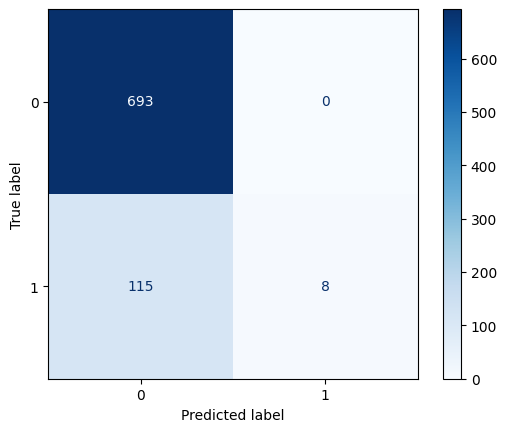

In [ ]:
logReg_liblinear = LogisticRegression(solver='liblinear', C=1)
logReg_liblinear.fit(X_train, y_train)
y_pred_liblinear = logReg_liblinear.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_liblinear))
print(f1_score(y_true=y_test, y_pred=y_pred_liblinear))

with plt.style.context("default"): #temporarily set the plot style
    fig = plt.figure(figsize=(20,15))
    ax = plot_confusion_matrix(logReg_liblinear, X_test, y_test, values_format="", cmap="Blues")

# model_balanced = SVC(gamma='scale', #balancing dataset
#           class_weight='balanced' 
#            )

# model_balanced.fit(X_train_scaled, y_train)
# y_pred_SVC_bal = model_balanced.predict(X_test_scaled)

logreg_acc = logReg_liblinear.score(X_test, y_test)*100
logreg_f1 = f1_score(y_test, y_pred_liblinear)


results_df_3 = pd.DataFrame(data=[["Default Logistic",
                                    # test_score, train_score,  
                                    logreg_acc, logreg_f1, ]], 
                          columns=['Model',
                                  #  "Test Score", 'Train Score', 
                                   'Accuracy %', 'F1 test score',  ])

results_df = results_df.append(results_df_3, ignore_index=True)
results_df

## Testing different C (inverse-regularization strength) values for the liblinear solver
Testing different C values to see if changing the resolution will improve the model's predictive ability.

Results show that there is a steep increase in F1 score when increasing the C from 1 to 3, then a plateau as C continues to increase. When C is decreased, the F1 score similarly decreases.

When C = 11 the F1 score peaks at with f1_score = 0.16296296296296298


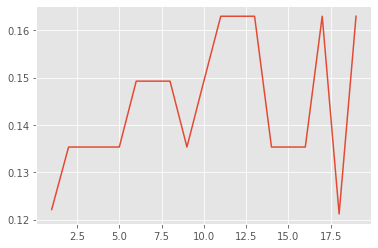

In [ ]:
c_range = np.array(range(1, 20))
f1_scores = []
for c in c_range:
    logReg_liblinear = LogisticRegression(solver='liblinear', C=c, random_state=20)
    logReg_liblinear.fit(X_train, y_train)
    y_pred_liblinear = logReg_liblinear.predict(X_test)
    f1_scores.append(f1_score(y_true=y_test, y_pred=y_pred_liblinear))
plt.plot(c_range.reshape(-1,1), f1_scores)
print('When C =', c_range[f1_scores.index(np.array(f1_scores).max())], 'the F1 score peaks at with f1_score =', np.array(f1_scores).max())

When C = 0.778 the F1 score peaks at with f1_score = 0.1221374045801527


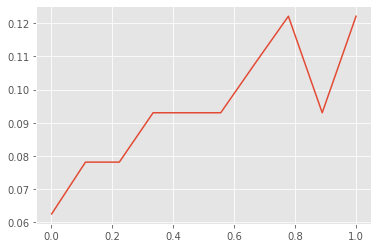

In [ ]:
c_range = np.linspace(0.001, 1, 10)
f1_scores = []
for c in c_range:
    logReg_liblinear = LogisticRegression(solver='liblinear', C=c, random_state=20)
    logReg_liblinear.fit(X_train, y_train)
    y_pred_liblinear = logReg_liblinear.predict(X_test)
    f1_scores.append(f1_score(y_true=y_test, y_pred=y_pred_liblinear))
plt.plot(c_range, f1_scores)
print('When C =', c_range[f1_scores.index(np.array(f1_scores).max())], 'the F1 score peaks at with f1_score =', np.array(f1_scores).max())

<Figure size 2000x1500 with 0 Axes>

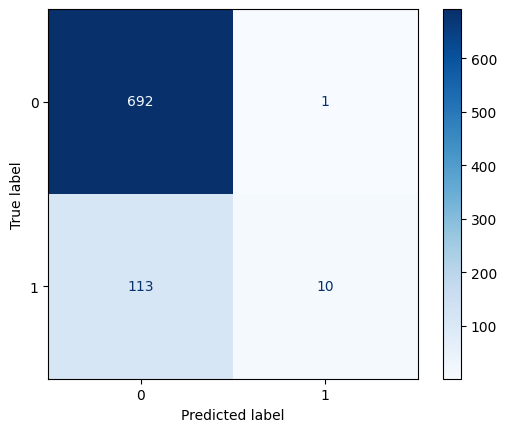

In [ ]:
logReg_liblinear = LogisticRegression(solver='liblinear', C=8, random_state=20)
logReg_liblinear.fit(X_train, y_train)

with plt.style.context("default"): #temporarily set the plot style
    fig = plt.figure(figsize=(20,15))
    ax = plot_confusion_matrix(logReg_liblinear, X_test, y_test, values_format="", cmap="Blues")

## Comparing different solvers
Comparing the different available solvers in the scikit learn class, `newton-cg` was found to be the most effective model for fitting to this dataset. The `lbfgs`, `sag`, and `saga` solvers all failed to converge. `liblinear` has a lower F1 score than `newton-cg`, however if C is increased to 3, the `liblinear` solver can match `newton-cg`.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.1221374045801527, 0.06299212598425198, 0.16417910447761194, 0.06250000000000001, 0.06250000000000001]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


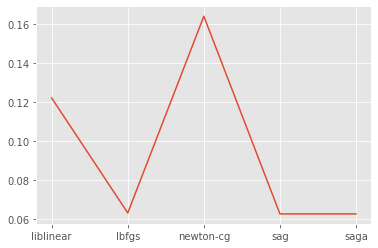

In [ ]:
solver_options = np.array(['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'])
f1_scores = []

for solve in solver_options:
    logReg = LogisticRegression(solver=solve, random_state=20)
    logReg.fit(X_train, y_train)
    y_pred = logReg.predict(X_test)
    f1_scores.append(f1_score(y_true=y_test, y_pred=y_pred))

print(f1_scores)
plt.plot(solver_options, f1_scores)

## Testing different C values for the `newton-cg` solver
Results show that the F1-score increases as C approaches 0, with no change as it increases from 1.

When C = 0.5133076923076922 the F1 score peaks at with f1_score = 0.16417910447761194


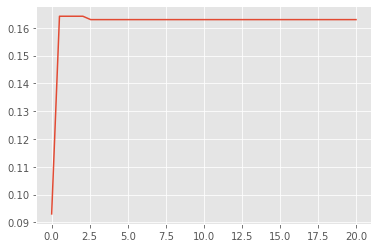

In [ ]:
c_range = np.linspace(0.0005, 20, 40)
f1_scores = []
for c in c_range:
    logReg = LogisticRegression(solver='newton-cg', C=c, random_state=20)
    logReg.fit(X_train, y_train)
    y_pred = logReg.predict(X_test)
    f1_scores.append(f1_score(y_true=y_test, y_pred=y_pred))
plt.plot(c_range, f1_scores)
print('When C =', c_range[f1_scores.index(np.array(f1_scores).max())], 'the F1 score peaks at with f1_score =', np.array(f1_scores).max())

## Visualize accuracy of the classification with a Confusion Matrix
Based on the F1-score analysis, the most suitable solver is `newton-sg` with `C=0.0005`. This model's predictions are visualized using a Confusion Matrix below. Clearly, the model's ability to classify `TenYearCHD` is pretty pitiful.

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       693
           1       1.00      0.05      0.09       123

    accuracy                           0.86       816
   macro avg       0.93      0.52      0.51       816
weighted avg       0.88      0.86      0.80       816



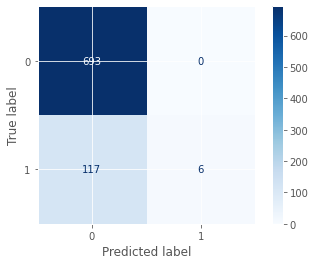

In [ ]:
logReg_newton = LogisticRegression(solver='newton-cg', C=0.0005, random_state=20)
logReg_newton.fit(X_train, y_train)
y_pred_logReg_newton = logReg_newton.predict(X_test)

print(classification_report(y_test, y_pred_logReg_newton))
plot_confusion_matrix(logReg_newton, X_test, y_test, values_format="", cmap="Blues")

## Re-Fit using fewer features
Only using the top 3 most correlated features:
1. Age
2. diaBP
3. prevalentHyp

F1-score of 0 was obtained with only 3 features. Test using the top 5 most correlated features:
4. diabetes
5. BPMeds

No improvement was observed.

liblinear
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       693
           1       0.50      0.02      0.03       123

    accuracy                           0.85       816
   macro avg       0.68      0.51      0.47       816
weighted avg       0.80      0.85      0.78       816

newton-cg
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       693
           1       0.00      0.00      0.00       123

    accuracy                           0.85       816
   macro avg       0.42      0.50      0.46       816
weighted avg       0.72      0.85      0.78       816



<Figure size 2000x1500 with 0 Axes>

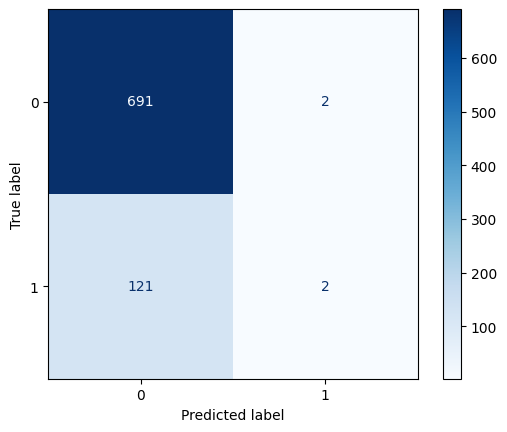

<Figure size 2000x1500 with 0 Axes>

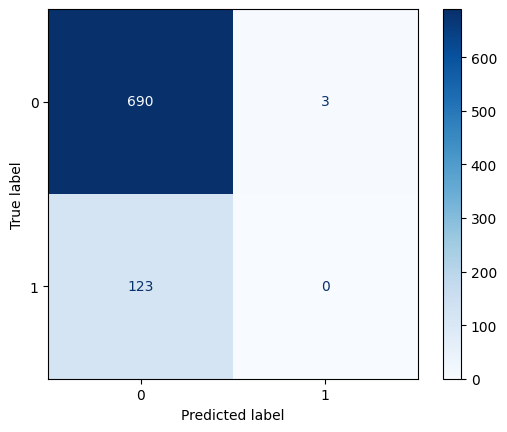

In [ ]:
y2 = df['TenYearCHD']
X2 = df[['age', 
    'prevalentHyp',
    'diaBP', 
    'diabetes',
    'BPMeds']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify = y)

logReg_liblinear = LogisticRegression(solver='liblinear', C=8, random_state=20)
logReg_liblinear.fit(X_train2, y_train2)
print('liblinear')
print(classification_report(y_test2, logReg_liblinear.predict(X_test2)))

with plt.style.context("default"): #temporarily set the plot style
    fig = plt.figure(figsize=(20,15))
    ax = plot_confusion_matrix(logReg_liblinear, X_test2, y_test2, values_format="", cmap="Blues")

logReg_newton.fit(X_train2, y_train2)
print('newton-cg')
print(classification_report(y_test2, logReg_newton.predict(X_test2)))

with plt.style.context("default"): #temporarily set the plot style
    fig = plt.figure(figsize=(20,15))
    ax = plot_confusion_matrix(logReg_newton, X_test2, y_test2, values_format="", cmap="Blues")

In [ ]:
#check model accuracy with measures
log_accuracy = accuracy_score(y_test2,y_pred_logReg_newton)
log_f1 = f1_score(y_test2,y_pred_logReg_newton)
print("Accuracy: ",log_accuracy)
print("F1-Score: ",log_f1)

Accuracy:  0.8419117647058824
F1-Score:  0.0


## Logistic Regression with Balanced Data

 When Logistic Regression is run with class_weight='balanced' to balance the data, it improves the F1 score from 0.12 to 0.40, while the overall accuracy has dropped from 86% to 68%

              precision    recall  f1-score   support

           0       0.93      0.68      0.78       693
           1       0.28      0.72      0.40       123

    accuracy                           0.68       816
   macro avg       0.61      0.70      0.59       816
weighted avg       0.83      0.68      0.73       816

0.40366972477064217


<Figure size 2000x1500 with 0 Axes>

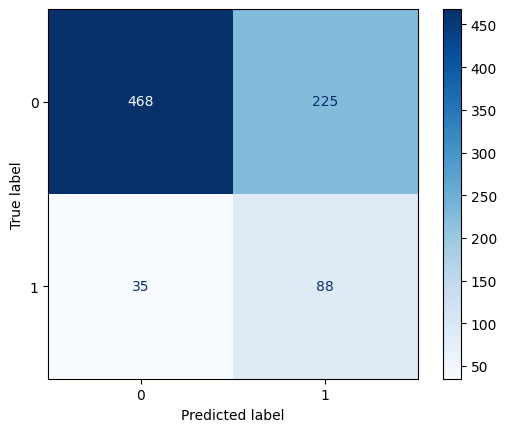

In [ ]:
logReg_liblinear_balanced = LogisticRegression(solver='liblinear', C=1, class_weight='balanced')
logReg_liblinear_balanced.fit(X_train, y_train)
y_pred_liblinear_balanced = logReg_liblinear_balanced.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_liblinear_balanced))
print(f1_score(y_true=y_test, y_pred=y_pred_liblinear_balanced))

with plt.style.context("default"): #temporarily set the plot style
    fig = plt.figure(figsize=(20,15))
    ax = plot_confusion_matrix(logReg_liblinear_balanced, X_test, y_test, values_format="", cmap="Blues")

# Decision Tree


In [ ]:
#import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt



> First Iteration - 11 Features


In [ ]:
#feature selection
#first iteration
feature_cols = ['male', 'age', 'currentSmoker', 'cigsPerDay','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI']

X = df[feature_cols]
y = df['TenYearCHD']

In [ ]:
#split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [ ]:
#create and train decision tree, predict the response
dt = DecisionTreeClassifier(criterion='entropy')#parameter set B
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
#check model accuracy with measures
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print("F1-Score: ",metrics.f1_score(y_test,y_pred))

Accuracy:  0.7565359477124183
F1-Score:  0.2696078431372549


In [ ]:
#check result counts for each classification group
count_one = 0
count_zero = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        count_one = count_one + 1
    else:
        count_zero = count_zero + 1
print(count_one)
print(count_zero)

212
1012


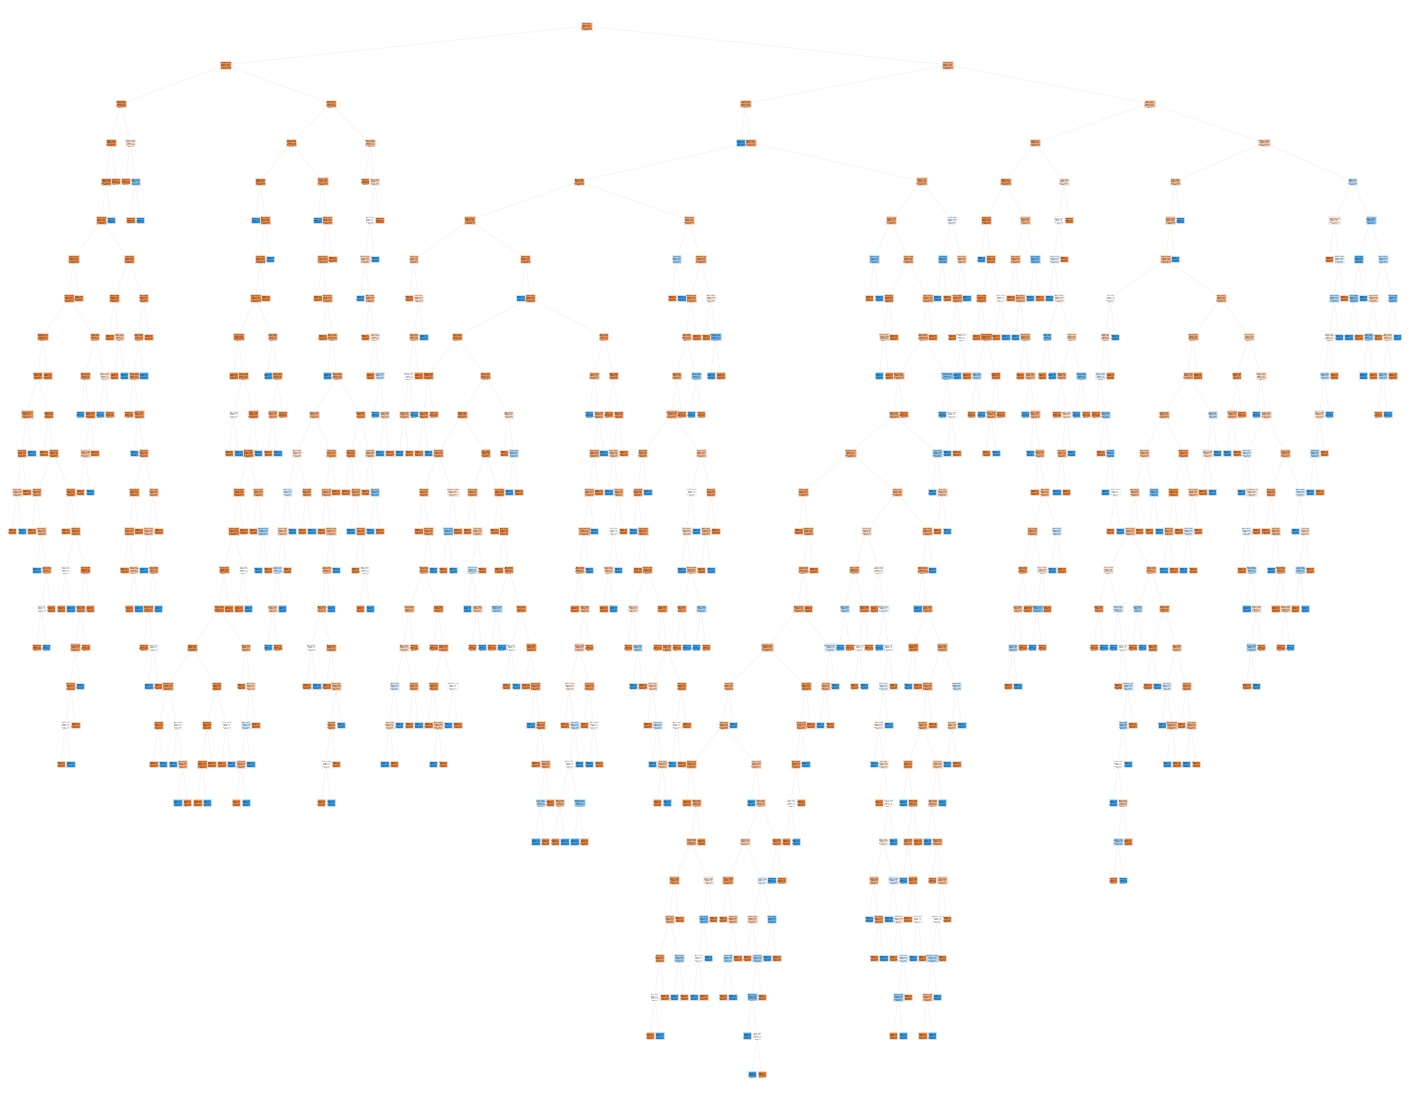

In [ ]:
#plot output
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names='TenYearCHD',
                   filled=True)


> Second Iteration - 4 Features




In [ ]:
#feature selection
#second iteration
feature_cols = ['male','age','prevalentHyp','sysBP']
X = df[feature_cols]
y = df['TenYearCHD']

In [ ]:
#split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [ ]:
#create and train decision tree, predict the response
dt = DecisionTreeClassifier(criterion='entropy')#parameter set B
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
#check model accuracy with measures
dr_accuracy = metrics.accuracy_score(y_test,y_pred)
dr_f1 = metrics.f1_score(y_test,y_pred)
print("Accuracy: ",dr_accuracy)
print("F1-Score: ",dr_f1)

Accuracy:  0.7532679738562091
F1-Score:  0.22164948453608246


In [ ]:
#check result counts for each classification group
count_one = 0
count_zero = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        count_one = count_one + 1
    else:
        count_zero = count_zero + 1
print(count_one)
print(count_zero)

192
1032


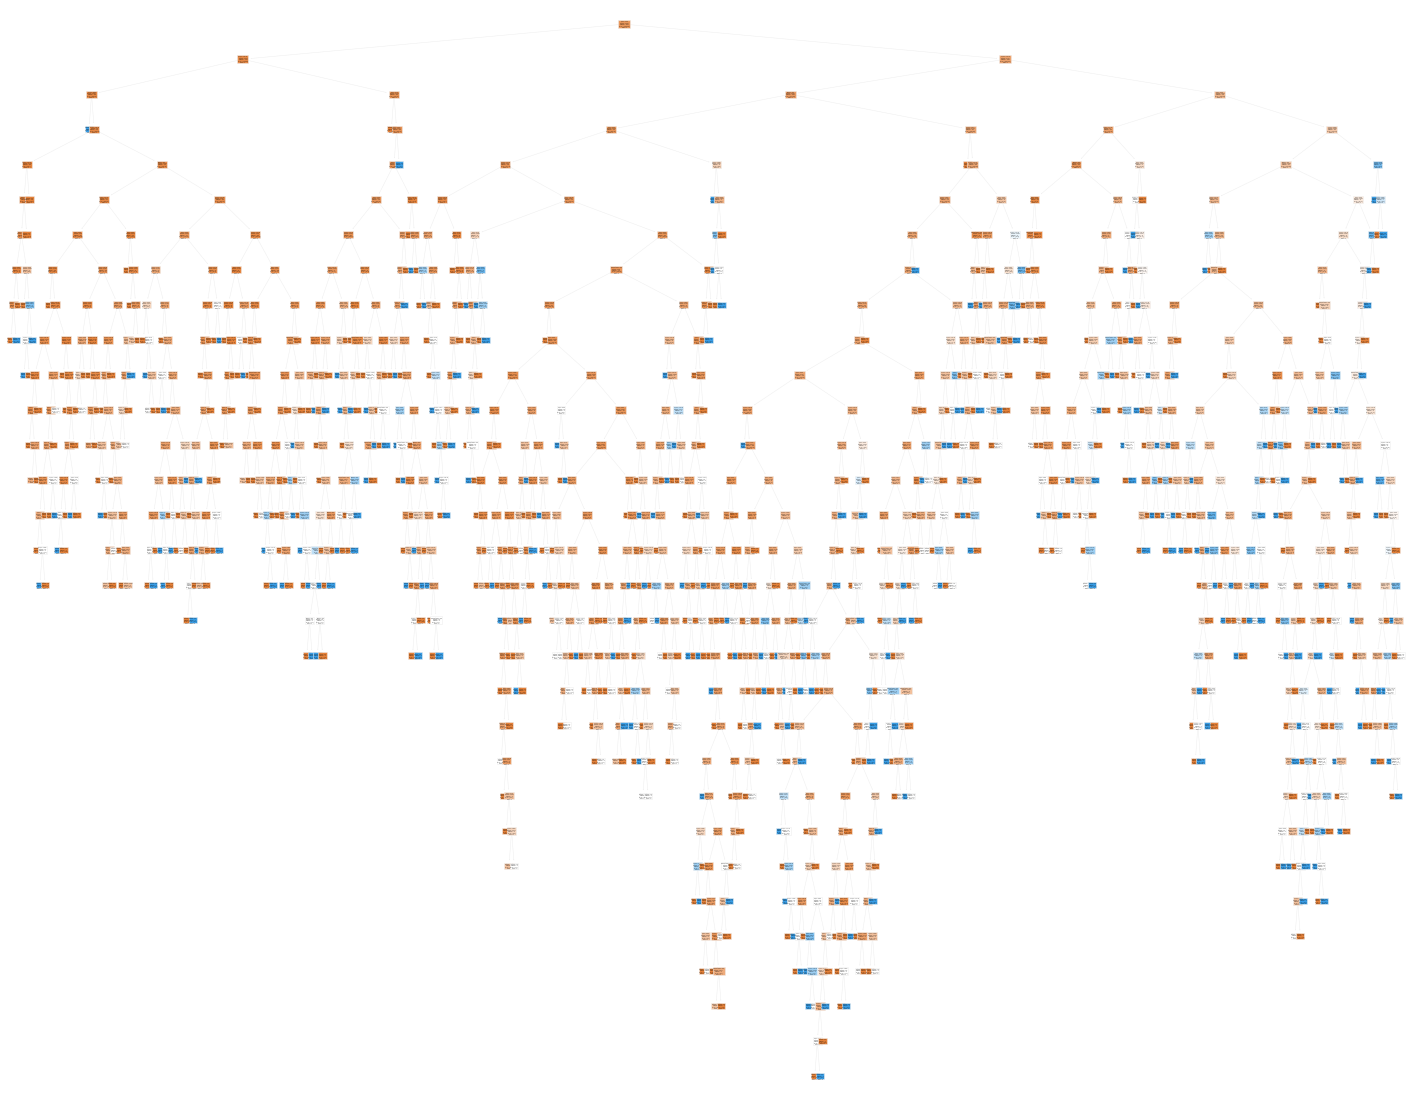

In [ ]:
#plot output
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names='TenYearCHD',
                   filled=True)